Importação dos dados que estão presente em um repositório no Github no formato de arquivos .csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
x1 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras_csv_files/Database_1/df1_mov_all.csv?raw=true', compression = None)
x = x1.drop(x1.columns[0], axis=1)

In [3]:
x = x.values.reshape(x.shape[0], x.shape[1], 1) #comando necessário para colocar a matriz de entrada x em um formato compatível com os neurônios de um CNN. Neste caso, foi necessário fazer uma camada de profundidade igual a 1.
print(x.shape)

(900, 3000, 1)


Definição da matriz de saída *y*

In [ ]:
base = np.ones((150,1), dtype=np.int64)
mov_cyl = base*0
mov_hook = base*1
mov_lat = base*2
mov_palm = base*3
mov_spher = base*4
mov_tip = base*5

In [ ]:
mov = np.vstack([mov_cyl,mov_hook,mov_lat,mov_palm,mov_spher,mov_tip])
y = pd.DataFrame(mov)

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
x_train.shape

(603, 3000, 1)

In [ ]:
y_train.shape

(603, 1)

In [ ]:
x_test.shape

(297, 3000, 1)

In [ ]:
y_test.shape

(297, 1)


CNN 1D - MODELO 1

In [ ]:
import keras
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import GlobalAveragePooling1D
from keras.layers import Flatten

from keras.utils.vis_utils import plot_model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2998, 32)          128       
                                                                 
 conv1d_1 (Conv1D)           (None, 2996, 32)          3104      
                                                                 
 flatten (Flatten)           (None, 95872)             0         
                                                                 
 dropout (Dropout)           (None, 95872)             0         
                                                                 
 dense (Dense)               (None, 6)                 575238    
                                                                 
Total params: 578,470
Trainable params: 578,470
Non-trainable params: 0
_________________________________________________________________


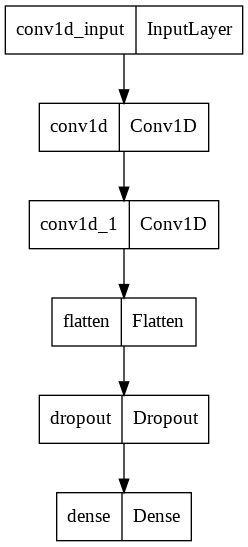

In [ ]:
num_classes = 6

model = keras.models.Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

plot_model(model, to_file='model.png')

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
treino = model.fit(x_train, y_train, batch_size=16, epochs=5)

Epoch 1/5
38/38 [==============================] - 4s 90ms/step - loss: 1.8283 - accuracy: 0.1990
Epoch 2/5
38/38 [==============================] - 3s 87ms/step - loss: 1.2390 - accuracy: 0.5274
Epoch 3/5
38/38 [==============================] - 3s 89ms/step - loss: 0.5606 - accuracy: 0.8027
Epoch 4/5
38/38 [==============================] - 3s 90ms/step - loss: 0.2334 - accuracy: 0.9486
Epoch 5/5
38/38 [==============================] - 3s 88ms/step - loss: 0.0830 - accuracy: 0.9867


In [ ]:
avaliacao = model.evaluate(x_train,y_train)

19/19 [==============================] - 1s 37ms/step - loss: 0.0337 - accuracy: 1.0000


Avaliação do Modelo via Matriz de Confusão

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
#from pretty_confusion_matrix import pp_matrix

In [ ]:
pred = model.predict(x_test)
y_pred = pred.argmax(axis=-1)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 7 14  2 11 11  4]
 [ 3 29  3  0 10  0]
 [ 0  6 23 15  0 15]
 [ 5 10 13 13  8  9]
 [ 5 14  0  0 21  0]
 [ 0  3 10 14  0 19]]


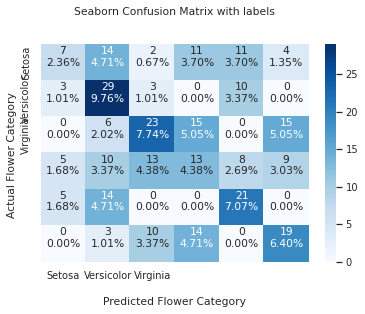

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#group_names = ['True Neg','False Pos','False Neg','True Pos','True Pos','True Pos','True Pos','True Pos','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(6,6)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Flower Category')
ax.set_ylabel('Actual Flower Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])
ax.yaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])

## Display the visualization of the Confusion Matrix.
plt.show()


In [ ]:
qualidade = cm.diagonal()/cm.sum(axis=1)
qualidade

array([0.14285714, 0.64444444, 0.38983051, 0.22413793, 0.525     ,
       0.41304348])

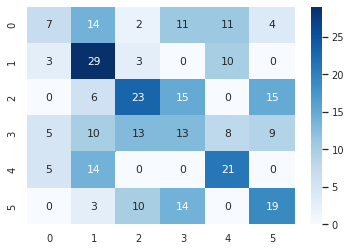

In [ ]:
df_cm = pd.DataFrame(cm, range(6),range(6))

#plt.figure(figsize = (10,7))
sn.set(font_scale=0.9)#for label size
sn.heatmap(df_cm, cmap='Blues', annot=True)# font size

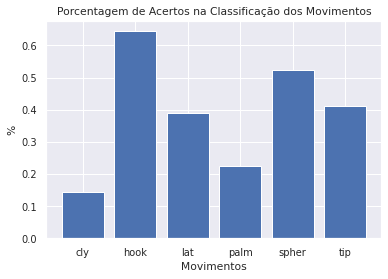

In [ ]:
import matplotlib.pyplot as plt

grupos = ['cly', 'hook', 'lat', 'palm', 'spher', 'tip']
plt.bar(grupos, qualidade)
plt.xlabel('Movimentos')
plt.ylabel('%')
plt.title('Porcentagem de Acertos na Classificação dos Movimentos')
plt.show()

In [ ]:
desvio = np.std(qualidade)
desvio

0.16935551616779118

In [ ]:
pip install pretty_confusion_matrix

/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:200: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:201: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:203: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:204: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be remo

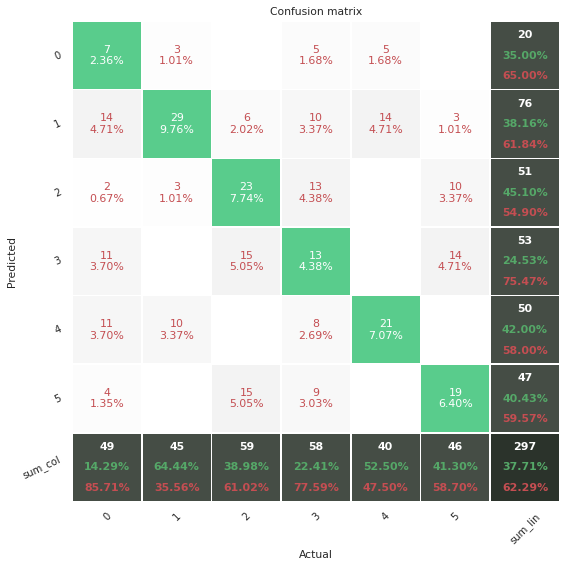

/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:200: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:201: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:203: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:204: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be remo

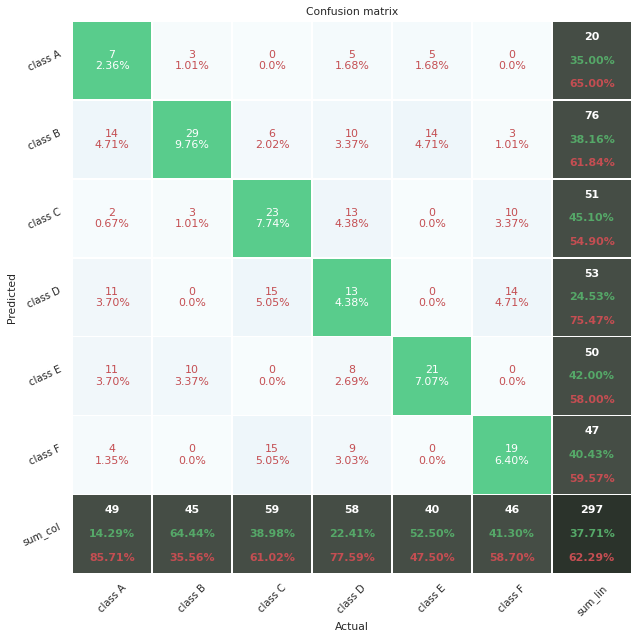

In [ ]:
import numpy as np
from pretty_confusion_matrix import pp_matrix
from pretty_confusion_matrix import pp_matrix_from_data


#pp_matrix_from_data(y_test, y_pred)
pp_matrix(df_cm, cmap='binary')
pp_matrix_from_data(y_test, y_pred, cmap='BuPu')